# Dev of diel and tidal migration

In [4]:
import numpy as np
import matplotlib.pyplot as plt

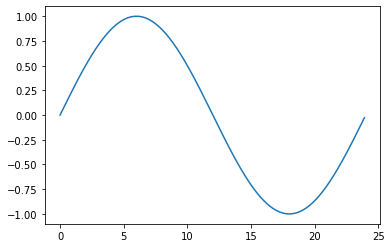

In [5]:
frequency = 24
phase = 0

x = np.arange(0,24,0.1)
y = np.sin( (x/frequency+phase)*2*np.pi)

plt.plot(x,y)

## Diel Migration

In [13]:
import astral
from astral import sun
import datetime
from datetime import datetime,timezone,timedelta

In [9]:
location = [53,10]
model_start_time = 1325379600.0
location = astral.LocationInfo(timezone="UTC",latitude=location[0], longitude=location[1])
model_start_time = datetime.date.fromtimestamp(model_start_time)#self.shared_info.model_start_time
noon = astral.sun.sun(location.observer, date=model_start_time)['noon'].timestamp()
model_start_time = 1325379600.0

In [16]:
time = np.arange(model_start_time,model_start_time+3600*24,360)

noon = noon
params = {}
params['period'] = 24*60*60.
params['phase'] = 0.

In [27]:
    #for t in time:
    x = np.abs(time - noon + params['phase'])%params['period']/params['period']
    v_velocity_scaling = np.cos(2*np.pi*x)
    #print(datetime.fromtimestamp(t,tz=timezone.utc).astimezone(timezone(timedelta(hours=-1))).ctime())
    #print(x,v_velocity_scaling)
    v_velocity_scaling = np.sign(v_velocity_scaling)

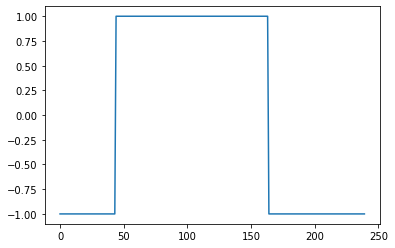

In [28]:
plt.plot(v_velocity_scaling)

In [29]:
from oceantracker.user_post_processing.loadOutputFiles import load_particle_track_vars
tracks = load_particle_track_vars('/scratch/local1/output/22_02_09_horizontal_migration_experiment_v02/22_02_09_horizontal_migration_experiment_v02_runInfo.json')
time_steps = 10


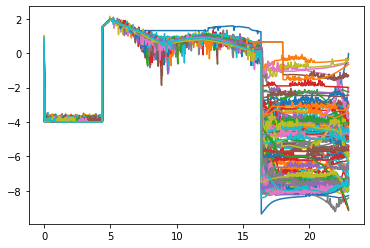

In [30]:
from oceantracker.user_post_processing.loadOutputFiles import load_particle_track_vars
tracks = load_particle_track_vars('/scratch/local1/output/22_02_09_horizontal_migration_experiment_v02/22_02_09_horizontal_migration_experiment_v02_runInfo.json')
time_steps = 10
out = plt.plot((tracks['time'][::time_steps]-np.min(tracks['time'][::time_steps]))/3602,tracks['x'][::time_steps,:100,2])

In [30]:
ii = 0
particle = tracks.variables['particle_ID'][:] == ii
x = tracks.variables['x'][particle]


## Tidal Migration

In [3]:
from netCDF4 import Dataset

In [173]:
#tidal_elevation

n_days = 12
tidal_elevation = np.zeros(24*n_days)

for ii in range(n_days):
    df = Dataset(f'/scratch/local1/hzg2/schout_1{ii}.nc')
    tidal_elevation[ii*24:ii*24+24] = df.variables['elev'][:,10000]

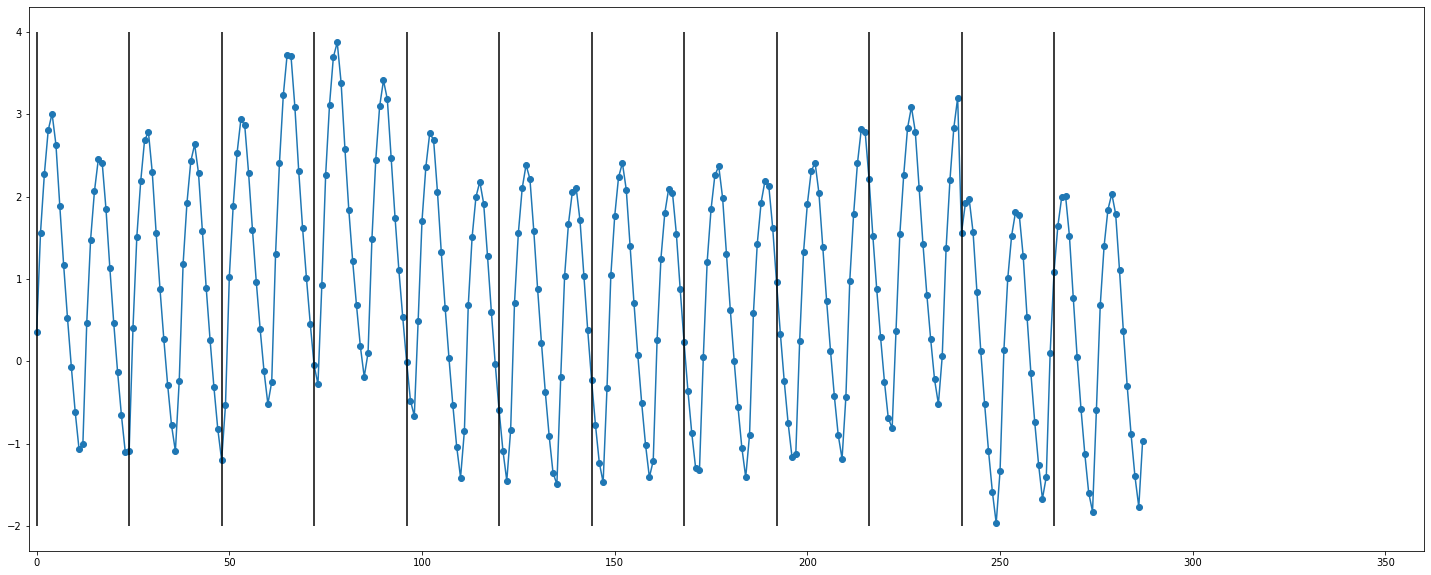

In [174]:

    plt.figure(figsize=(25,10))
    plt.scatter(np.arange(len(tidal_elevation)),tidal_elevation)
    plt.plot(tidal_elevation)
    plt.xlim(-2,24*15)
    plt.vlines(np.arange(0,n_days*24,24),-2,4,color='black')

In [186]:

    N = tidal_elevation.size

    tidal_elevation_fft = np.fft.fft(tidal_elevation)
    phase = np.angle(tidal_elevation_fft)
    tidal_elevation_fft[0] = 0
    tidal_elevation_fft[int(N/2+1):] = 0                            # set negative frequencies to zero #[] (N/2 +1):
    icarrier = np.argmax(np.abs(tidal_elevation_fft))               # determine index of carrier frequency
    fcarrier = 1 / N * icarrier                                     # carrier frequency in time units given by the time sampling interval. Max (Nyquist) frequ of 1/2 corresponds to index N.
    

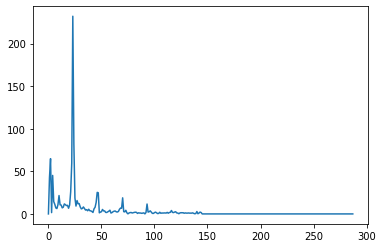

In [193]:
plt.plot(np.abs(tidal_elevation_fft))

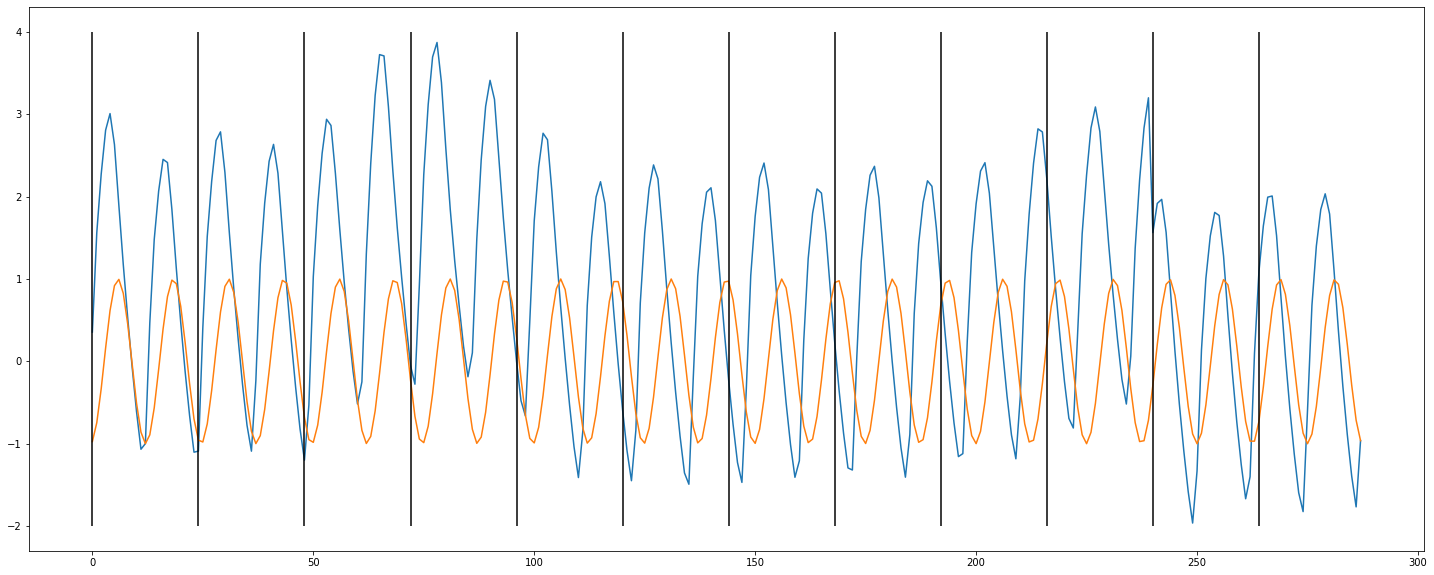

In [191]:
plt.figure(figsize=(25,10))
x = np.arange(len(tidal_elevation))
plt.plot(x,tidal_elevation)
plt.plot(x,np.sin(2*np.pi*x*fcarrier+phase[icarrier]))
plt.vlines(np.arange(0,n_days*24,24),-2,4,color='black')

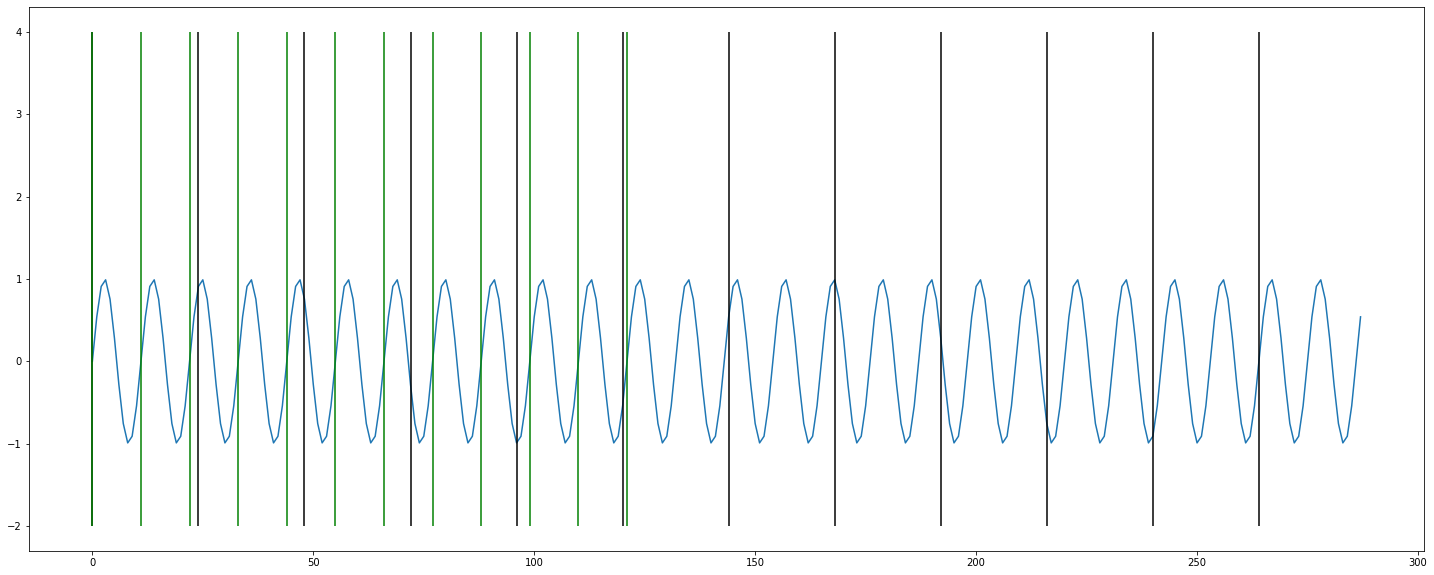

In [183]:
plt.figure(figsize=(25,10))
plt.plot(np.sin(2*np.pi*1/11*x))
plt.vlines(np.arange(0,n_days*24,24),-2,4,color='black')
plt.vlines(np.arange(0,n_days*11,11),-2,4,color='green')


In [185]:

    phase[icarrier]

-1.3425396936457465